# Expo_7: Cross validation & Evaluating metric and scoring

Entrenamiento sin Cross-Validation

In [14]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# crea un conjunto de datos sinteticos
X, y = make_blobs(random_state=0)
# dividir los datos y etiquetas en un conjunto de entrenamiento y otro de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# Crear un modelo, ajustandolo al conjunto de entrenamiento, usando Fit.
logreg = LogisticRegression().fit(X_train, y_train)
# se evalua el modelo en el conjunto de prueba usando Score
# (para la clasificación calcula la fracción de muestras clasificadas correctamente).
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test))) 

Test set score: 0.88


# Cross-validation
En la validación cruzada, los datos se dividen repetidamente y se entrenan "varios modelos"

Tomando un k en especifico
1. Se divide el modelo en $k=5$ partes
1. Se entrenan varios modelos de la siguiente manera.
    1. Modelo 1 -> (Fold 1 = prueba) (Folds (2-3-4-5) = entrenamiento)
    1. Modelo 2 -> (Fold 2 = prueba) (Folds (1-3-4-5) = entrenamiento)
    1. Modelo 3 -> (Fold 3 = prueba) (Folds (1-2-4-5) = entrenamiento)
    1. Modelo 4 -> (Fold 4 = prueba) (Folds (1-2-3-5) = entrenamiento)
    1. Modelo 5 -> (Fold 5 = prueba) (Folds (1-2-3-4) = entrenamiento)
1. Para cada uno de estos paso se calcula la precisión, obteniendo $5$ datos.


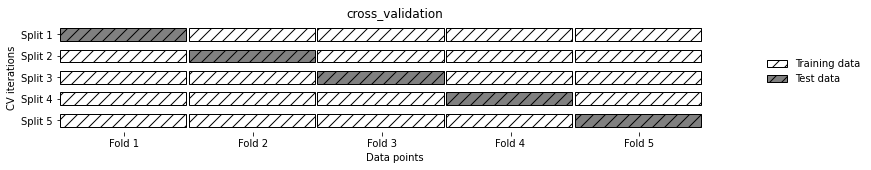

In [15]:
import matplotlib.pyplot as plt
import mglearn
mglearn.plots.plot_cross_validation()

Cross-validation está implementado en scikit-learn usando la función cross_val_score del módulo model_selection

Los parámetros de la función cross_val_score son:
1. El modelo que queremos evaluar
1. Los datos de entrenamiento
1. Las etiquetas

## Evaluemos LogisticRegression en el conjunto de datos del iris:

In [16]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris = load_iris()
logreg = LogisticRegression()
scores = cross_val_score(logreg, iris.data, iris.target, cv=3)
#cross_val_score(Modelo, Datos de entrenamiento, Etiquetas, parametro k)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.98 0.96 0.98]
Average cross-validation score: 0.97


In [17]:
# Podemos cambiar el número de pliegues utilizados cambiando el parámetro cv
# segun la litertura, suele ser k=3 el predeterminado, pero en este caso pordemos ver que:
# k=5 es el predeterminado
scores = cross_val_score(logreg, iris.data, iris.target) 
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Average cross-validation score: 0.97


In [18]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=10) 
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [1.         0.93333333 1.         1.         0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]
Average cross-validation score: 0.97


Una forma común de resumir la precisión de la validación cruzada es calcular la media:

In [19]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.97


La media nos muestra una precisión de al rededor del 97% y cuando observamos los cinco puntajes producidos por la validación cruzada de cinco veces, también podemos concluir que existe una variación relativamente alta en la precisión entre subconjuntos, que van desde el 100% de precisión hasta el 90% de precisión.

## Stratified k-Fold Cross-Validation

In [20]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris labels:\n{}".format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Cuando se tienen ciertos conjuntos de datos como el anterior, no es muy bueno el resultado de k-folds cross-validation, por lo que podemos usar, Stratified k-Fold Cross-Validation, ya que se dividen los datos de manera que las proporciones entre clases sean las mismas en cada pliegue que en todo el conjunto de datos.

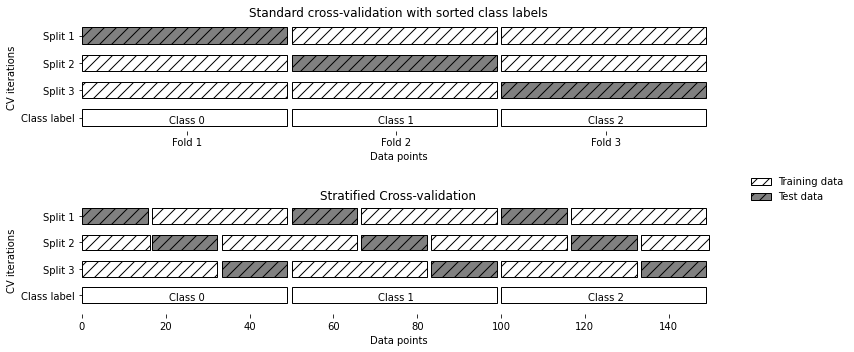

In [21]:
mglearn.plots.plot_stratified_cross_validation()

Teniendo asi un resultado parejo para todo conjunto de datos.

## Leave-one-out cross-validation

In [22]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv iterations:  150
Mean accuracy: 0.97


Normalmente nos da un resultado mas acertado, pero una mayor cantidad de iteraciones, por lo cual tiene un mayor consumo de memoria y tiempo computacional.

## Shuffle-split cross-validation

En la validación cruzada de división aleatoria, cada división muestrea muchos puntos para el conjunto de entrenamiento y muchos puntos (disjuntos) para el conjunto de prueba. Esta división se repite n_iter veces.

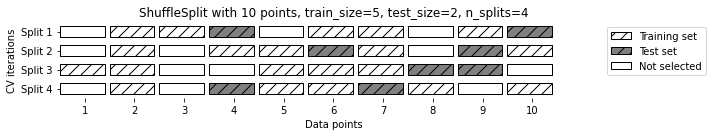

In [23]:
mglearn.plots.plot_shuffle_split()

cuatro iteraciones para dividir un conjunto de datos que consta de 10 puntos, con un conjunto de entrenamiento de 5 puntos y conjuntos de prueba de 2 puntos cada uno.

In [24]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.94666667 0.98666667 0.97333333 0.96       0.96       0.96
 0.97333333 0.94666667 0.96       0.92      ]


La validación cruzada aleatoria y dividida permite controlar el número de iteraciones independientemente de los tamaños de entrenamiento y prueba. También permite usar solo una parte de los datos en cada iteración, submuestrear los datos de esta manera puede ser útil para experimentar con grandes conjuntos de datos.

## Cross-validation with groups
Se toman grupos previamente identificados, los cuales no deben dividirse en entre los conjuntos de entrenamienro y prueba.

In [25]:
from sklearn.model_selection import GroupKFold
# crea una base de datos sintetica
X, y = make_blobs(n_samples=12, random_state=0)
# se asume que las tres primeras partes pertenecen al mismo grupo
# y luego las 4 siguientes, etc...
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.75       0.6        0.66666667]


# Metricas de evaluación y puntuación

## Clasificacion binaria

Para la clasificación binaria, se suele hablar de una clase positiva y una clase negativa, entendiendo que la clase positiva es la que se busca.


In [26]:
from sklearn.datasets import load_digits
digits = load_digits() 
#conjunto de datos desequilibrados
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [27]:
import numpy as np
#usar el DummyClassifier para predecir siempre la clase mayoritaria para ver qué tan poco informativa puede ser la precisión:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [False]
Test score: 0.90


Obtuvimos una precisión cercana al 90% sin aprender nada.

In [28]:
# Clasificador real
from sklearn.tree import DecisionTreeClassifier
# DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Test score: 0.92


In [29]:
from sklearn.linear_model import LogisticRegression
# LogisticRegression vs default DummyClassifier
dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy score: {:.2f}".format(dummy.score(X_test, y_test)))
logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

dummy score: 0.84
logreg score: 0.98


El clasificador ficticio que produce una salida aleatoria es claramente el peor del lote (según la precisión), mientras que LogisticRegression produce muy buenos resultados.

### Matriz de confusión

In [30]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[402   1]
 [  6  41]]


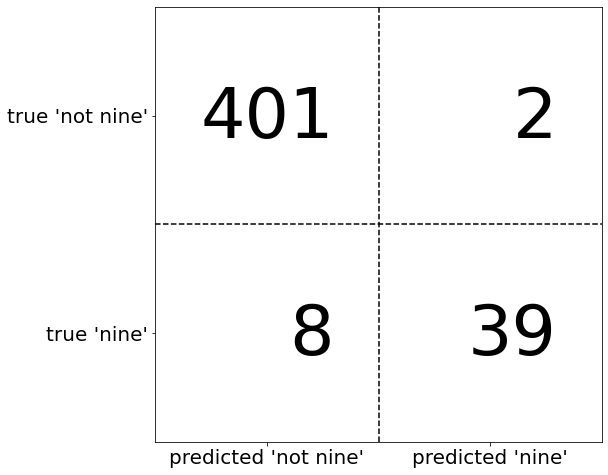

In [31]:
mglearn.plots.plot_confusion_matrix_illustration()

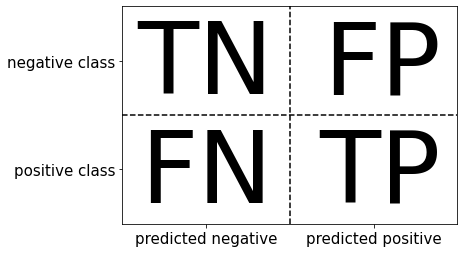

In [32]:
mglearn.plots.plot_binary_confusion_matrix()

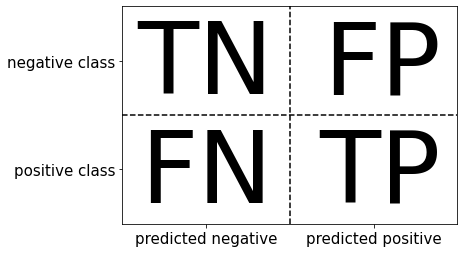

In [33]:
mglearn.plots.plot_binary_confusion_matrix()

In [34]:
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nDummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[366  37]
 [ 44   3]]

Decision tree:
[[390  13]
 [ 24  23]]

Logistic Regression
[[402   1]
 [  6  41]]
